In [1]:
import numpy as np
import itertools
from functionsDiffusion import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.ticker as ticker
import pandas as pd
def ahlgfp():
    for i,a in enumerate(ahl):
        U = full_setup(sender_seed= [], receiver_seed=rec_cross, ahl = a)
        sim = runModel(1000,0.1,theta,U)
        gfp[i] = sim[6,r,c,9000].mean()
    ax.plot(ahl, gfp)
from matplotlib.lines import Line2D

In [2]:
def mpga(plot):
    plot.spines['top'].set_visible(False)
    plot.spines['right'].set_visible(False)
    plot.spines['left'].set_linewidth(1.5)
    plot.spines['bottom'].set_linewidth(1.5)
    plot.yaxis.set_tick_params(width = 2)
    plot.xaxis.set_tick_params(width = 2)
    plot.title.set_size(12)
    plot.xaxis.label.set_size(12)
    plot.yaxis.label.set_size(12)
    plot.tick_params(axis = 'x', labelsize = 15)
    plot.tick_params(axis = 'y', labelsize = 15)
    
    return plot

In [3]:
# ## THIS THIS THIS THIS THIS ##
# theta = {"x_s":4,           #luxi production rate  
#          "x_a":0.0007,      #ahl production rate
#         "x_g":4, #0.2     #gfp production rate
#         "lambda_a":2.3, #2.3  #ahl hill coeff
#         "K_a":20,
#         "D":0.03,
#         "D_a":0.03,
#         "w": 0.75,
#         "rho_n": 3,
#         "rc": 0.0006,
#         "Dc": 0.0001,
#         "rho": 0.0005,
#         "lambda_n": 2.0,
#         "lambda_g": 3,
#          "K_g": 50,
#         "K_n":80}

In [4]:
theta = {"x_s":50,           #luxi production rate  
         "x_a":0.001,      #ahl production rate
        "x_g":1.1, #0.2     #gfp production rate
        "lambda_a":10, #2.3  #ahl hill coeff
        "K_a":5,
        "D":0.03,
        "D_a":0.03,
        "w": 0.75,
        "rho_n": 3,
        "rc": 0.0006,
        "Dc": 0.0001,
        "rho": 0.0005,
        "lambda_n": 2.0,
        "lambda_g": 3,
         "K_g": 45,
        "K_n":80}

In [5]:
#before mistake found
# theta = {"x_s":6,           #luxi production rate  
#          "x_a":0.0007,      #ahl production rate
#         "x_g":1.1, #0.2     #gfp production rate
#         "lambda_a":2.3, #2.3  #ahl hill coeff
#         "K_a":20,
#         "D":0.03,
#         "D_a":0.03,
#         "w": 0.75,
#         "rho_n": 3,
#         "rc": 0.0006,
#         "Dc": 0.0001,
#         "rho": 0.0005,
#         "lambda_n": 2.0,
#         "lambda_g": 5,
#          "K_g": 50,
#         "K_n":80}

In [6]:
# theta = {"x_s":2,           #luxi production rate  
#          "x_a":0.0015,      #ahl production rate
#         "x_g":10, #0.2     #gfp production rate
#         "lambda_a":2.3, #2.3  #ahl hill coeff
#         "K_a":50,
#         "D":0.03,
#         "D_a":0.05,
#         "w": 0.75,
#         "rho_n": 3,
#         "rc": 0.0006,
#         "Dc": 0.0001,
#         "rho": 0.0005,
#         "lambda_n": 2.0,
#         "lambda_g": 3,
#          "K_g": 50,
#         "K_n":80}

    # 0 LuxI
    # 1 Arabinose
    # 2 Nutrients
    # 3 Sender
    # 4 C6
    # 5 Receiver
    # 6 GFP
    
    S = Dc * S_ficks + rc * N * U_grid[3]
    R = Dc * R_ficks + rc * N * U_grid[5]
    LuxI = x_s * N * hill(U_grid[1], lambda_a, K_a) * U_grid[3]
    c6 = D_a * c6_ficks + (x_a * U_grid[0]) - rho * U_grid[4]
    arabinose = D * arabinose_ficks
    n = D * n_ficks - rho_n * N * (U_grid[3] + U_grid[5])
    gfp = x_g * N * hill(U_grid[4], lambda_g, K_g) * U_grid[5]

In [7]:
# theta = {"x_s":20, 
#          "x_a":0.025,
#         "x_g": 15,
#         "lambda_a": 2,
#         "K_a":50,
#         "D":0.03,
#         "D_a":0.9,
#         "w": 0.75,
#         "rho_n": 3,
#         "rc": 0.0006,
#         "Dc": 0.0001,
#         "rho": 0.0005,
#         "lambda_n": 2.0,
#         "lambda_g": 3,
#          "K_g": 40,
#         "K_n":80}

## This set works for AND gate far positions
# theta = {"x_s":10,           #luxi production rate  
#          "x_a":0.0035,      #ahl production rate
#         "x_g":0.2, #0.2     #gfp production rate
#         "lambda_a":2.3, #2.3  #ahl hill coeff
#         "K_a":10,
#         "D":0.03,
#         "D_a":0.05,
#         "w": 0.75,
#         "rho_n": 3,
#         "rc": 0.0006,
#         "Dc": 0.0001,
#         "rho": 0.0005,
#         "lambda_n": 2.0,
#         "lambda_g": 3,
#          "K_g": 50,
#         "K_n":80}



#set01
# theta = {"x_s":2,           #luxi production rate  
#          "x_a":0.0015,      #ahl production rate
#         "x_g":0.2, #0.2     #gfp production rate
#         "lambda_a":2.3, #2.3  #ahl hill coeff
#         "K_a":10,
#         "D":0.03,
#         "D_a":0.05,
#         "w": 0.75,
#         "rho_n": 3,
#         "rc": 0.0006,
#         "Dc": 0.0001,
#         "rho": 0.0005,
#         "lambda_n": 2.0,
#         "lambda_g": 3,
#          "K_g": 50,
#         "K_n":80}

# ##BACKUP
# theta = {"x_s":4,           #luxi production rate  
#          "x_a":0.0015,      #ahl production rate
#         "x_g":0.2, #0.2     #gfp production rate
#         "lambda_a":2.3, #2.3  #ahl hill coeff
#         "K_a":10,
#         "D":0.03,
#         "D_a":0.05,
#         "w": 0.75,
#         "rho_n": 3,
#         "rc": 0.0006,
#         "Dc": 0.0001,
#         "rho": 0.0005,
#         "lambda_n": 2.0,
#         "lambda_g": 3,
#          "K_g": 50,
#         "K_n":80}

# theta = {"x_s":5, 
#          "x_a":0.01,
#         "x_g":0.2, #0.2
#         "lambda_a":3, #2.3
#         "K_a":20,
#         "D":0.03,
#         "D_a":0.02,
#         "w": 0.75,
#         "rho_n": 3,
#         "rc": 0.0006,
#         "Dc": 0.0001,
#         "rho": 0.0005,
#         "lambda_n": 2.0,
#         "lambda_g": 5,
#          "K_g": 60,
#         "K_n":80}

#1 ara -> LuxI

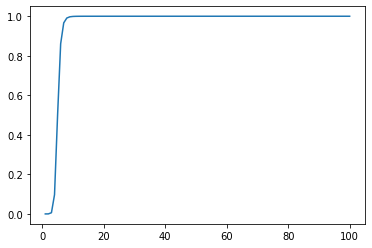

In [8]:
ara = np.linspace(1,100,100)
LuxI = hill(ara, theta['K_a'],theta['lambda_a'])
plt.plot(ara,LuxI)

#2 LuxI -> c6

#3 AHL vs GFP

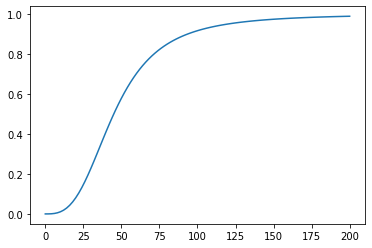

In [9]:
ahl = np.linspace(0,200,101)
GFP = hill(ahl, theta['K_g'], theta['lambda_g'])
plt.plot(ahl,GFP)

In [10]:
def multi_plots_vertical(sim, title=""):
    f, ax = plt.subplots(4, 2, sharex=False, sharey=False, figsize=(3.5, 7))

    f.suptitle(title, fontsize=40)
    im1 = ax[0, 0].imshow(sim[3], interpolation="none", cmap=cm.viridis, vmin=0, vmax=1)
    ax[0, 0].set_title("Sender", fontsize = 10)
    divider = make_axes_locatable(ax[0, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    ax[0, 0].axis("off")
    ax[0, 0].xaxis.label.set_size(7)
    ax[0, 0].yaxis.label.set_size(7)
    cb = f.colorbar(im1, cax=cax, shrink=0.8)
    cb.ax.tick_params(labelsize=6)

    im2 = ax[0, 1].imshow(sim[5], interpolation="none", cmap=cm.viridis, vmin=0, vmax=1)
    ax[0, 1].set_title("Receiver", fontsize = 10)
    ax[0, 1].axis("off")
    divider = make_axes_locatable(ax[0, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = f.colorbar(im2, cax=cax, shrink=0.8)
    cb.ax.tick_params(labelsize=6)

    im3 = ax[1, 0].imshow(sim[1], interpolation="none", cmap=cm.viridis, vmin=0)
    ax[1, 0].set_title("Arabinose (mM)", fontsize = 10)
    ax[1, 0].axis("off")
    divider = make_axes_locatable(ax[1, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = f.colorbar(im3, cax=cax, shrink=0.8)
    cb.ax.tick_params(labelsize=6)

    im4 = ax[1, 1].imshow(sim[3], interpolation="none", cmap=cm.viridis, vmin=0)
    ax[1, 1].set_title("LuxI", fontsize = 10)
    ax[1, 1].axis("off")
    divider = make_axes_locatable(ax[1, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = f.colorbar(im4, cax=cax, shrink=0.8)
    cb.ax.tick_params(labelsize=6)

    im5 = ax[2, 0].imshow(sim[4], interpolation="none", cmap=cm.viridis, vmin=0)
    ax[2, 0].set_title("AHL (nM)", fontsize = 10)
    ax[2, 0].axis("off")
    divider = make_axes_locatable(ax[2, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = f.colorbar(im5, cax=cax, shrink=0.8)
    cb.ax.tick_params(labelsize=6)

    im6 = ax[2, 1].imshow(sim[6], interpolation="none", cmap=cm.viridis, vmin=0)
    ax[2, 1].set_title("GFP", fontsize = 10)
    ax[2, 1].axis("off")
    divider = make_axes_locatable(ax[2, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = f.colorbar(im6, cax=cax, shrink=0.8)
    cb.ax.tick_params(labelsize=6)

    im7 = ax[3, 0].imshow(sim[2], interpolation="none", cmap=cm.viridis, vmin=0, vmax=100)
    ax[3, 0].set_title("Nutrients", fontsize = 10)
    ax[3, 0].axis("off")
    divider = make_axes_locatable(ax[3, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = f.colorbar(im7, cax=cax, shrink=0.8)
    cb.ax.tick_params(labelsize=6)

    ax[3, 1].axis('off')

    return(f)


In [11]:
rec_cross = [3,10,17,31,38,45,
            21,22,23,25,26,27]
sender = [24]

In [12]:
U = full_setup(sender_seed= sender, receiver_seed=rec_cross, ara = 50)
start = time.time()
sim = runModel(900,0.1,theta,U)
print(time.time() - start)
# np.save("AND01.npy",sim)

2.703890085220337


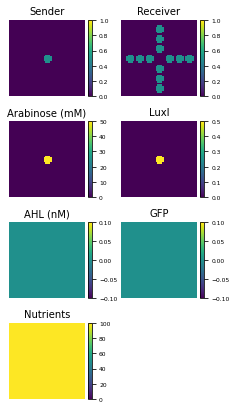

In [13]:
foo = multi_plots_vertical(sim[:,:,:,0]);

foo.subplots_adjust(hspace = 0.3, wspace = 0.35)

In [14]:
# foo.savefig("./simulations/sen-rec-t0.pdf", bbox_inches = 'tight')

Text(0.5, 1.0, 'C6')

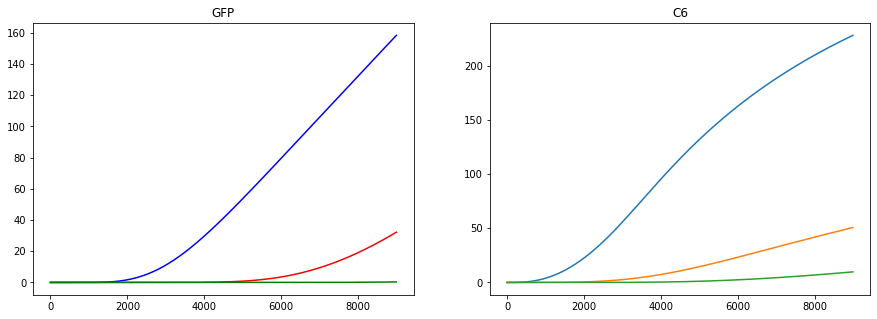

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))

n_rows = n_cols = 46

first = [17,25,31,23]
fr, fc = get_coo_from_pos(first)

second = [10,26,38,22]
sr, sc = get_coo_from_pos(second)

third = [3,27,45,21]
tr, tc = get_coo_from_pos(third)

ax1.plot(sim[6,fr,fc,:9000].mean(axis=0), color = 'blue')
ax1.plot(sim[6,sr,sc,:9000].mean(axis=0), color = 'red')
ax1.plot(sim[6,tr,tc,:9000].mean(axis=0), color = 'green')
ax1.set_title("GFP")

ax2.plot(sim[4,fr,fc,:10000].mean(axis=0), color = 'tab:blue')
ax2.plot(sim[4,sr,sc,:10000].mean(axis=0), color = 'tab:orange')
ax2.plot(sim[4,tr,tc,:10000].mean(axis=0), color = 'tab:green')
ax2.set_title("C6")

In [16]:
c6 = np.linspace(0,10)

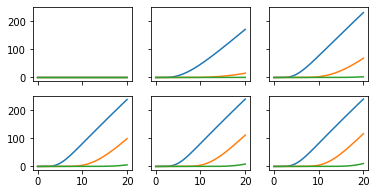

In [17]:
if 1:
    ara = [0,20,40,60,80,100]

    f, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(6,3))

    for i, a in enumerate(ara):
    # im1 = ax.flatten()[0].plot(sim[4,tr,tc,:10000].mean(axis=0), color = 'green')
        U = full_setup(sender_seed= sender, receiver_seed=rec_cross, ara = a)
        sim = runModel(1200,0.1,theta,U)
        im1 = ax.flatten()[i].plot(np.linspace(0,20,12000),sim[6,fr,fc,:].mean(axis=0), color = 'tab:blue')
        im1 = ax.flatten()[i].plot(np.linspace(0,20,12000),sim[6,sr,sc,:].mean(axis=0), color = 'tab:orange')
        im1 = ax.flatten()[i].plot(np.linspace(0,20,12000),sim[6,tr,tc,:].mean(axis=0), color = 'tab:green')

In [18]:
    for i,a in enumerate(ara):
        mpga(ax.flatten()[i])
        ax.flatten()[i].spines['top'].set_visible(False)
        ax.flatten()[i].spines['right'].set_visible(False)
        ax.flatten()[i].spines['left'].set_linewidth(2)
        ax.flatten()[i].spines['bottom'].set_linewidth(2)
        ax.flatten()[i].set_title(str(a) + " mM", fontsize = 10)
        ax.flatten()[i].tick_params(axis = 'x', labelsize = 10)    
        ax.flatten()[i].tick_params(axis = 'y', labelsize = 10)
        ax.flatten()[i].locator_params(nbins = 6, axis = 'x')
        ax.flatten()[i].locator_params(nbins = 6, axis = 'y')
    #     ax.flatten()[2].set_xticklabels(["0","3","6","9","12","15"]) 
    #     ax.flatten()[i].xaxis.set_major_locator(plt.MaxNLocator(6))
    f.subplots_adjust(hspace = 0.50)
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    # plt.tick_params(axis = 'y')

    f.text(0.5, 0.00, 'Time (hours)', ha='center')
    f.text(0.04, 0.5, 'GFP', va='center', rotation='vertical')

Text(0.04, 0.5, 'GFP')

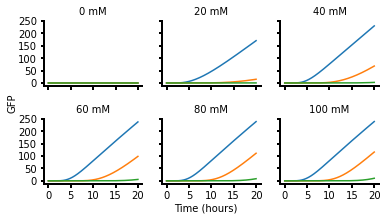

In [19]:
f

In [98]:
# f.savefig("./simulations/sen-rec-line-plots.pdf", bbox_inches = 'tight')
# /Users/lucarosa/Library/Mobile Documents/com~apple~CloudDocs/THESIS/Upgrade/figures/chapter4/simulations

# RECEIVER

### Line plot AHL VS GFP: 15 hours

In [20]:
def ahlgfp():
    for i,a in enumerate(ahl):
        U = full_setup(sender_seed= [], receiver_seed=rec_cross, ahl = a)
        sim = runModel(1000,0.1,theta,U)
        gfp[i] = sim[6,r,c,6000].mean()
    ax.plot(ahl, gfp)

    gfp = x_g * N * hill(U_grid[4], lambda_g, K_g) * U_grid[5]

# theta['K_g'] = 25
# theta['lambda_g'] = 5

print(theta['lambda_g'], theta['K_g'])

3 45


Check Hill function

In [100]:
theta

{'x_s': 50,
 'x_a': 0.001,
 'x_g': 1.1,
 'lambda_a': 10,
 'K_a': 5,
 'D': 0.03,
 'D_a': 0.03,
 'w': 0.75,
 'rho_n': 3,
 'rc': 0.0006,
 'Dc': 0.0001,
 'rho': 0.0005,
 'lambda_n': 2.0,
 'lambda_g': 3,
 'K_g': 45,
 'K_n': 80}

Text(0, 0.5, 'GFP rate')

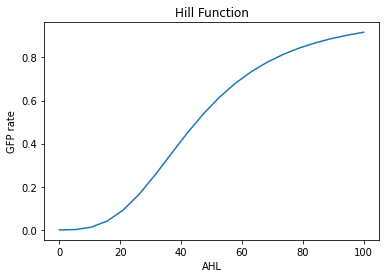

In [101]:
rec_cross = [3,10,17,31,38,45,
            21,22,23,25,26,27]
r, c = get_coo_from_pos(rec_cross)
ahl = np.linspace(0,100,20)
gfp = np.zeros(ahl.shape)
y = hill(ahl, theta['K_g'], theta['lambda_g'])
plt.plot(ahl, y)
plt.title('Hill Function')
plt.xlabel("AHL")
plt.ylabel("GFP rate")

Run the simulations

In [102]:
ahl = np.linspace(0,150,10)
gfp = np.zeros(ahl.shape)
for i,a in enumerate(ahl):
    U = full_setup(sender_seed= [], receiver_seed=rec_cross, ahl = a)
    sim = runModel(1000,0.1,theta,U)
    gfp[i] = sim[6,r,c,6000].mean()

Plotting

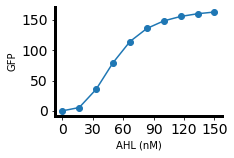

In [107]:
f, ax = plt.subplots(figsize = (3,2))
ax.plot(ahl, gfp, marker = 'o')
ax.set_xlabel("AHL (nM)")
ax.set_ylabel("GFP")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
# ax.set_title(r"$\lambda_g = 5$")
ax.yaxis.set_ticks(np.arange(0,200,50))
ax.xaxis.set_ticks(np.arange(0,151,30))
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)

# f.savefig("./simulations/ahl-vs-gfp.pdf", bbox_inches = 'tight')

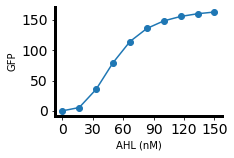

In [108]:
f

In [111]:
f.savefig("./simulations/ahl-vs-gfp-line-plot.pdf", bbox_inches = 'tight')

In [155]:
!open .

In [119]:
sim[6,r,c,6000].std()

12.949411386672153

### Cross images GFP intensity: 15 Hours

In [26]:
ahl = np.linspace(0,100,9, dtype = int)

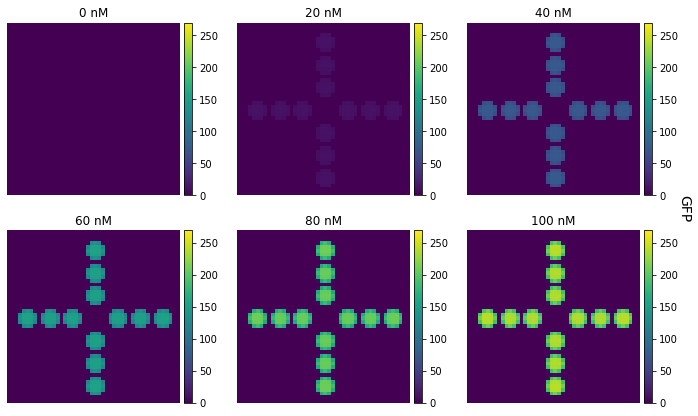

In [76]:
ahl = np.array([0,20,40,60,80,100])
f, ax = plt.subplots(2,3, figsize = (10,6))
im = [0]*6

for i, a in enumerate(ahl):
    U = full_setup(sender_seed= [], receiver_seed=rec_cross, ahl = a)
    sim = runModel(900,0.1,theta,U)
    im[i] = ax.flatten()[i].imshow(sim[6,:,:,-1], interpolation = 'none', vmin = 0, vmax = 270, cmap = cm.viridis)
    divider = make_axes_locatable(ax.flatten()[i])
    ax.flatten()[i].set_title(str(a) + (' nM'))
    cax = divider.append_axes("right", size="5%", pad=0.05)
    f.colorbar(im[i], cax=cax, shrink=0.8)
    ax.flatten()[i].axis("off")

f.text(0.96, 0.5, 'GFP', va='center', rotation=270, fontsize=14)
f.subplots_adjust(left=0.025, bottom=0.05, right=0.93, top=0.93)

In [77]:
# f.savefig("./ahl-vs-gfp-panel-1.pdf", bbox_inches = 'tight')

In [81]:
!open {os.getcwd()}

In [79]:
os.getcwd()

'/Users/lucarosa/Documents/PhD/Coding/Python/colony-com'

In [115]:
r, c = get_coo_from_pos(rec_cross)
ahl = np.linspace(0,100,11, dtype = int)
# gfp = np.zeros(ahl.shape

df = pd.DataFrame()
for i, a in enumerate(ahl):
    print(a)
    U = full_setup(sender_seed= [], receiver_seed=rec_cross, ahl = a)
    sim = runModel(1200,0.1,theta,U)
    df[a] = sim[6,r,c,:-1].mean(axis=0)
#     plt.plot(sim[6,r,c,:-1].mean(axis=0))

0
10
20
30
40
50
60
70
80
90
100


In [116]:
df.index = df.index/600

In [119]:
color = ['#a6cee3','#1f78b4','#b2df8a',
        '#33a02c','#fb9a99','#e31a1c',
        '#fdbf6f','#ff7f00','#cab2d6',
        '#6a3d9a','#ffff99','#b15928']

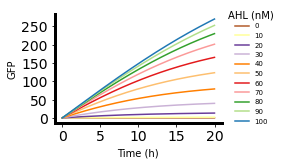

In [125]:
f, ax = plt.subplots(figsize = (3,2))
df.plot(ax = ax, color = color)
ax.legend(title = 'AHL (nM)', frameon = False, bbox_to_anchor=(1.00, 1.1), fontsize = 7)
ax.set_xlabel('Time (h)')
ax.set_ylabel('GFP')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
# ax.set_title(r"$\lambda_g = 5$")
# ax.yaxis.set_ticks(np.arange(0,176,25))
# ax.xaxis.set_ticks(np.arange(0,101,20))
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.yaxis.set_ticks(np.arange(0,251,50))
ax.xaxis.set_ticks(np.arange(0,21,5))
# ax.locator_params(nbins = 5, axis = 'x')
# ax.locator_params(nbins = 5, axis = 'y')
# ax.set_xticklabels(np.linspace(0,20,5))


In [126]:
f.savefig("./simulations/receiver-time-vs-gfp.pdf", bbox_inches = 'tight')

In [269]:
!open .

In [224]:
np.linspace(0,20,5)

array([ 0.,  5., 10., 15., 20.])

## AND gate bar chart

In [182]:
print(theta['K_g'])

35


In [28]:
theta

{'x_s': 50,
 'x_a': 0.001,
 'x_g': 11,
 'lambda_a': 10,
 'K_a': 5,
 'D': 0.03,
 'D_a': 0.03,
 'w': 0.75,
 'rho_n': 3,
 'rc': 0.0006,
 'Dc': 0.0001,
 'rho': 0.0005,
 'lambda_n': 2.0,
 'lambda_g': 2.2,
 'K_g': 35,
 'K_n': 80}

In [29]:
# theta['K_g'] = 30

In [30]:
and_gate = np.zeros(4)
senders = [[10,38],10,38,[]]
# senders = [[3,45],3,45,[]]
output = [24]
r, c = get_coo_from_pos(output)

df_and = pd.DataFrame()

for i, inputs in enumerate(senders):
    U = full_setup(sender_seed= inputs, receiver_seed=[17,24,31], ara = 100)
    sim = runModel(900,0.1,theta,U)
    df_and[i] = sim[6,r,c,:].mean(axis = 0)
    and_gate[i] = sim[6,r,c,5000].mean()

/Users/lucarosa/Documents/PhD/Coding/Python/colony-com/functionsDiffusion.py:21: RuntimeWarning: invalid value encountered in power
  h = s**lam / (K**lam + s**lam)


In [31]:
# f, (ax1,ax2) = plt.subplots(1,2, figsize =(15,5))
df_and.plot(ax = ax4)
ax5.bar(["11","10","01","00"],and_gate)

NameError: name 'ax4' is not defined

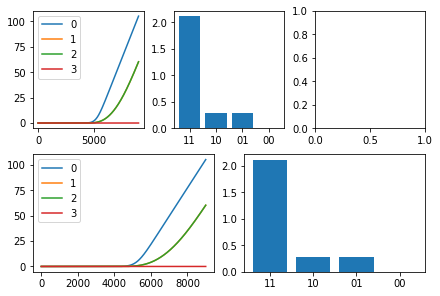

In [186]:
f

In [127]:
# f.savefig("coop.pdf", bbox_inches = 'tight')

## LOGIC GATE COMBINATION PANELS

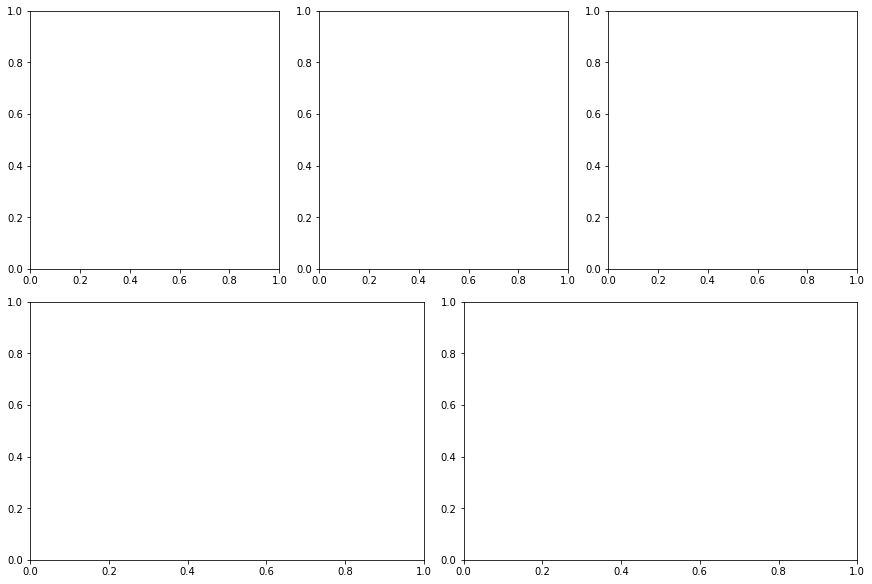

In [5]:
f = plt.figure(constrained_layout=True, figsize = (12,8))
gs = f.add_gridspec(2, 6)
ax = [0]*5
ax[0] = f.add_subplot(gs[0, :2])
ax[1] = f.add_subplot(gs[0, 2:4])
ax[2] = f.add_subplot(gs[0, 4:])
ax[3] = f.add_subplot(gs[1, :3])
ax[4] = f.add_subplot(gs[1, 3:])

## Sender positions: 3 - 45

213.6169748652484
213.5930715742558
213.61681215387915


Text(23, 42, 'S')

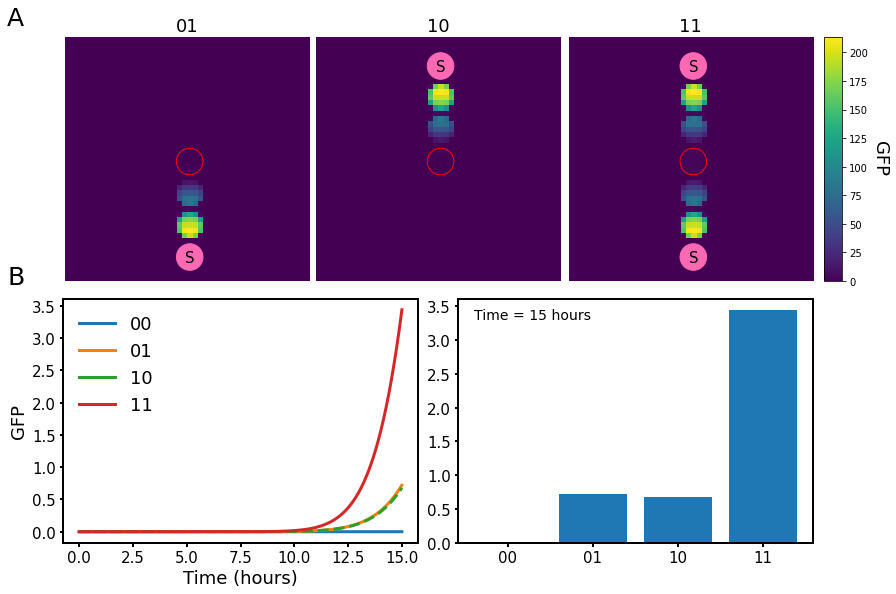

In [211]:
#create grid structure
f = plt.figure(constrained_layout=True, figsize = (12,8))
gs = f.add_gridspec(2, 6)
ax = [0]*5
ax[0] = f.add_subplot(gs[0, :2])
ax[1] = f.add_subplot(gs[0, 2:4])
ax[2] = f.add_subplot(gs[0, 4:])
ax[3] = f.add_subplot(gs[1, :3])
ax[4] = f.add_subplot(gs[1, 3:])

#cells position
rec_pos = [10,17,24,31,38]
and_gate = np.zeros(4)
senders = [45,3,[3,45]]
# senders = [[3,45],3,45,[]]
output = [24]
r, c = get_coo_from_pos(output)

df_and = pd.DataFrame()
#run simulations and create dfs
for i, inputs in enumerate(senders):
    U = full_setup(sender_seed= inputs, receiver_seed=rec_pos, ara = 100)
    sim = runModel(900,0.1,theta,U)
    ax[i].imshow(sim[6,:,:,-1])
    df_and[i+1] = sim[6,r,c,:].mean(axis = 0)
    and_gate[i+1] = sim[6,r,c,-1].mean()
    [a.axis('off') for a in ax[:3]]
    print(sim[6,:,:,-1].max())
    
#add colorbar
im3 = ax[2].get_images()[0]
f.colorbar(im3, ax=ax[2])

#run simulation w/ no inputs
U = full_setup(sender_seed= [], receiver_seed=rec_pos, ara = 100)
sim = runModel(900,0.1,theta,U)
df_and.insert(loc = 0, column = 'x00', value = sim[6,r,c,:].mean(axis = 0))
# and_gate.insert(loc = 0, column = 'x00', value = sim[6,r,c,-1].mean(axis = 0)) 
# df_and[3] = sim[6,r,c,:].mean(axis = 0)
# and_gate[3] = sim[6,r,c,-1].mean()
df_and.index = df_and.index/600
df_and.plot(ax = ax[3], linewidth = '3', style = ["-", "-", "--","-"])
ax[4].bar(["00","01","10","11"],and_gate)

ax[0].set_title("01", fontsize = 18)
ax[1].set_title("10", fontsize = 18)
ax[2].set_title("11", fontsize = 18)

ax[3].spines['top'].set_visible(True)
ax[3].spines['right'].set_visible(True)
ax[3].spines['left'].set_linewidth(2)
ax[3].spines['bottom'].set_linewidth(2)
ax[3].spines['top'].set_linewidth(2)
ax[3].spines['right'].set_linewidth(2)
ax[3].yaxis.set_tick_params(width = 2)
ax[3].xaxis.set_tick_params(width = 2)
ax[3].title.set_size(12)
ax[3].xaxis.label.set_size(12)
ax[3].yaxis.label.set_size(12)
ax[3].tick_params(axis = 'x', labelsize = 15)
ax[3].tick_params(axis = 'y', labelsize = 15)
# ax[3].set_yticks(np.arange(0,0.9,0.1))
ax[3].set_xlabel('Time (hours)', fontsize = 18),
ax[3].set_ylabel('GFP', fontsize = 18)
# ax[3].set_ylim(-0.5, 220)

ax[4].spines['top'].set_visible(True)
ax[4].spines['right'].set_visible(True)
ax[4].yaxis.set_tick_params(width = 2)
ax[4].xaxis.set_tick_params(width = 2)
ax[4].spines['left'].set_linewidth(2)
ax[4].spines['bottom'].set_linewidth(2)
ax[4].spines['right'].set_linewidth(2)
ax[4].spines['top'].set_linewidth(2)
ax[4].tick_params(axis = 'x', labelsize = 15)
ax[4].tick_params(axis = 'y', labelsize = 15)
# ax[4].set_yticks(np.arange(0,0.9,0.1))

legend_elements = [Line2D([0], [0], color='tab:blue', lw=3, label='00'),
                   Line2D([0], [0], color = 'tab:orange', lw =3,label='01'),
                   Line2D([0], [0], color = 'tab:green', lw =3,label='10'),
                   Line2D([0], [0], color = 'tab:red', lw =3,label='11')]
ax[3].legend(handles = legend_elements, frameon = False, fontsize = 18)
f.text(1,0.75, 'GFP',va = 'center', rotation = 270, fontsize = 18 )
f.text(0.54, 0.47, 'Time = 15 hours', fontsize = 14)
f.text(0, 0.53, "B",fontsize = 25)
f.text(0, 0.98, "A", fontsize = 25)

circle1 = plt.Circle((23,23), 2.5, color = 'r', fill = False)
circle2 = plt.Circle((23,23), 2.5, color = 'r', fill = False)
circle3 = plt.Circle((23,23), 2.5, color = 'r', fill = False)
ax[0].add_patch(circle1)
ax[1].add_patch(circle2)
ax[2].add_patch(circle3)

circle1 = plt.Circle((23,5), 2.5, color = 'hotpink', fill = True)
circle2 = plt.Circle((23,5), 2.5, color = 'hotpink', fill = True)
ax[1].add_patch(circle1)
ax[2].add_patch(circle2)
circle1 = plt.Circle((23,41), 2.5, color = 'hotpink', fill = True)
circle2 = plt.Circle((23,41), 2.5, color = 'hotpink', fill = True)
ax[0].add_patch(circle1)
ax[2].add_patch(circle2)

ax[1].annotate("S", xy=(23, 6), fontsize=15, ha="center")
ax[2].annotate("S", xy=(23, 6), fontsize=15, ha="center")
ax[0].annotate("S", xy=(23, 42), fontsize=15, ha="center")
ax[2].annotate("S", xy=(23, 42), fontsize=15, ha="center")

In [212]:
f.savefig('/Users/lucarosa/Library/Mobile Documents/com~apple~CloudDocs/THESIS/Upgrade/figures/logic/3-45-panel-2.pdf', bbox_inches = 'tight')
f.savefig('./simulations/3-45-panel-2.pdf', bbox_inches = 'tight')

In [153]:
!open .

## Sender positions: 10 - 38

In [197]:
# theta["K_g"] = 45

In [129]:
theta

{'x_s': 50,
 'x_a': 0.001,
 'x_g': 1.1,
 'lambda_a': 10,
 'K_a': 5,
 'D': 0.03,
 'D_a': 0.03,
 'w': 0.75,
 'rho_n': 3,
 'rc': 0.0006,
 'Dc': 0.0001,
 'rho': 0.0005,
 'lambda_n': 2.0,
 'lambda_g': 3,
 'K_g': 45,
 'K_n': 80}

In [168]:
# theta["K_g"] = 120

213.66645798259245
213.666881013196
213.66011888091617


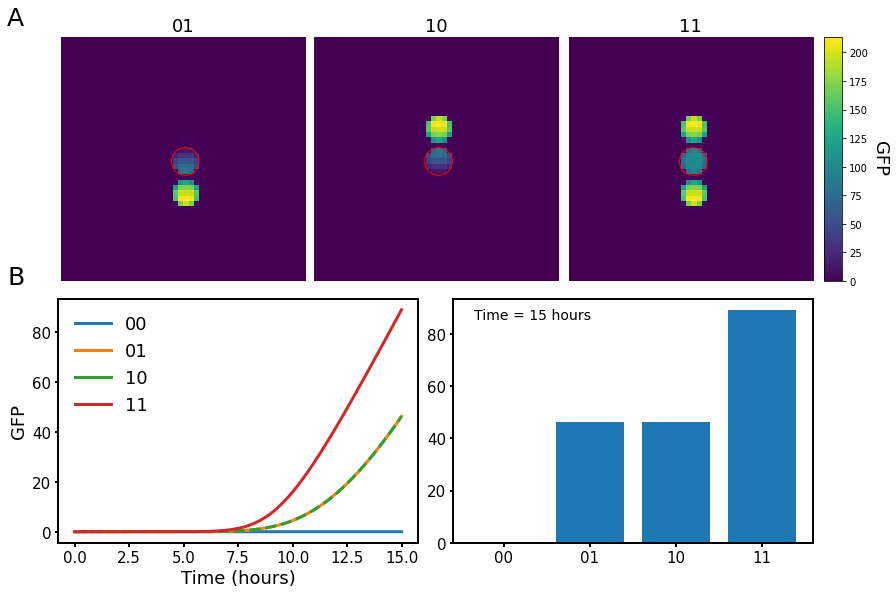

In [213]:
#create grid structure
f = plt.figure(constrained_layout=True, figsize = (12,8))
gs = f.add_gridspec(2, 6)
ax = [0]*5
ax[0] = f.add_subplot(gs[0, :2])
ax[1] = f.add_subplot(gs[0, 2:4])
ax[2] = f.add_subplot(gs[0, 4:])
ax[3] = f.add_subplot(gs[1, :3])
ax[4] = f.add_subplot(gs[1, 3:])

#cells position
rec_pos = [17,24,31]
and_gate = np.zeros(4)
senders = [38,10,[10,38]]
# senders = [[3,45],3,45,[]]
output = [24]
r, c = get_coo_from_pos(output)

df_and = pd.DataFrame()
#run simulations and create dfs
for i, inputs in enumerate(senders):
    U = full_setup(sender_seed= inputs, receiver_seed=rec_pos, ara = 100)
    sim = runModel(900,0.1,theta,U)
    ax[i].imshow(sim[6,:,:,-1])
    df_and[i+1] = sim[6,r,c,:].mean(axis = 0)
    and_gate[i+1] = sim[6,r,c,-1].mean()
    [a.axis('off') for a in ax[:3]]
    print(sim[6,:,:,-1].max())
    
#add colorbar
im3 = ax[2].get_images()[0]
f.colorbar(im3, ax=ax[2])

#run simulation w/ no inputs
U = full_setup(sender_seed= [], receiver_seed=rec_pos, ara = 100)
sim = runModel(900,0.1,theta,U)
df_and.insert(loc = 0, column = 'x00', value = sim[6,r,c,:].mean(axis = 0))
# and_gate.insert(loc = 0, column = 'x00', value = sim[6,r,c,-1].mean(axis = 0)) 
# df_and[3] = sim[6,r,c,:].mean(axis = 0)
# and_gate[3] = sim[6,r,c,-1].mean()
df_and.index = df_and.index/600
df_and.plot(ax = ax[3], linewidth = '3', style = ["-", "-", "--","-"])
ax[4].bar(["00","01","10","11"],and_gate)


ax[0].set_title("01", fontsize = 18)
ax[1].set_title("10", fontsize = 18)
ax[2].set_title("11", fontsize = 18)

ax[3].spines['top'].set_visible(True)
ax[3].spines['right'].set_visible(True)
ax[3].spines['left'].set_linewidth(2)
ax[3].spines['bottom'].set_linewidth(2)
ax[3].spines['top'].set_linewidth(2)
ax[3].spines['right'].set_linewidth(2)
ax[3].yaxis.set_tick_params(width = 2)
ax[3].xaxis.set_tick_params(width = 2)
ax[3].title.set_size(12)
ax[3].xaxis.label.set_size(12)
ax[3].yaxis.label.set_size(12)
ax[3].tick_params(axis = 'x', labelsize = 15)
ax[3].tick_params(axis = 'y', labelsize = 15)
# ax[3].set_yticks(np.arange(0,0.9,0.1))
ax[3].set_xlabel('Time (hours)', fontsize = 18),
ax[3].set_ylabel('GFP', fontsize = 18)
# ax[3].set_ylim(-0.5, 220)

ax[4].spines['top'].set_visible(True)
ax[4].spines['right'].set_visible(True)
ax[4].yaxis.set_tick_params(width = 2)
ax[4].xaxis.set_tick_params(width = 2)
ax[4].spines['left'].set_linewidth(2)
ax[4].spines['bottom'].set_linewidth(2)
ax[4].spines['right'].set_linewidth(2)
ax[4].spines['top'].set_linewidth(2)
ax[4].tick_params(axis = 'x', labelsize = 15)
ax[4].tick_params(axis = 'y', labelsize = 15)
# ax[4].set_ylim(-0.5, 220)
# ax[4].set_yticks(np.arange(0,0.9,0.1))

legend_elements = [Line2D([0], [0], color='tab:blue', lw=3, label='00'),
                   Line2D([0], [0], color = 'tab:orange', lw =3,label='01'),
                   Line2D([0], [0], color = 'tab:green', lw =3,label='10'),
                   Line2D([0], [0], color = 'tab:red', lw =3,label='11')]
ax[3].legend(handles = legend_elements, frameon = False, fontsize = 18)
f.text(1,0.75, 'GFP',va = 'center', rotation = 270, fontsize = 18 )
f.text(0.54, 0.47, 'Time = 15 hours', fontsize = 14)
f.text(0, 0.53, "B",fontsize = 25)
f.text(0, 0.98, "A", fontsize = 25)

circle1 = plt.Circle((23,23), 2.6, color = 'r', fill = False)
circle2 = plt.Circle((23,23), 2.6, color = 'r', fill = False)
circle3 = plt.Circle((23,23), 2.6, color = 'r', fill = False)
ax[0].add_patch(circle1)
ax[1].add_patch(circle2)
ax[2].add_patch(circle3)

In [214]:
circle1 = plt.Circle((23,11), 2.5, color = 'hotpink', fill = True)
circle2 = plt.Circle((23,11), 2.5, color = 'hotpink', fill = True)
ax[1].add_patch(circle1)
ax[2].add_patch(circle2)
circle1 = plt.Circle((23,35), 2.5, color = 'hotpink', fill = True)
circle2 = plt.Circle((23,35), 2.5, color = 'hotpink', fill = True)
ax[0].add_patch(circle1)
ax[2].add_patch(circle2)

ax[1].annotate("S", xy=(23, 12), fontsize=15, ha="center")
ax[2].annotate("S", xy=(23, 12), fontsize=15, ha="center")
ax[0].annotate("S", xy=(23, 36), fontsize=15, ha="center")
ax[2].annotate("S", xy=(23, 36), fontsize=15, ha="center")

Text(23, 36, 'S')

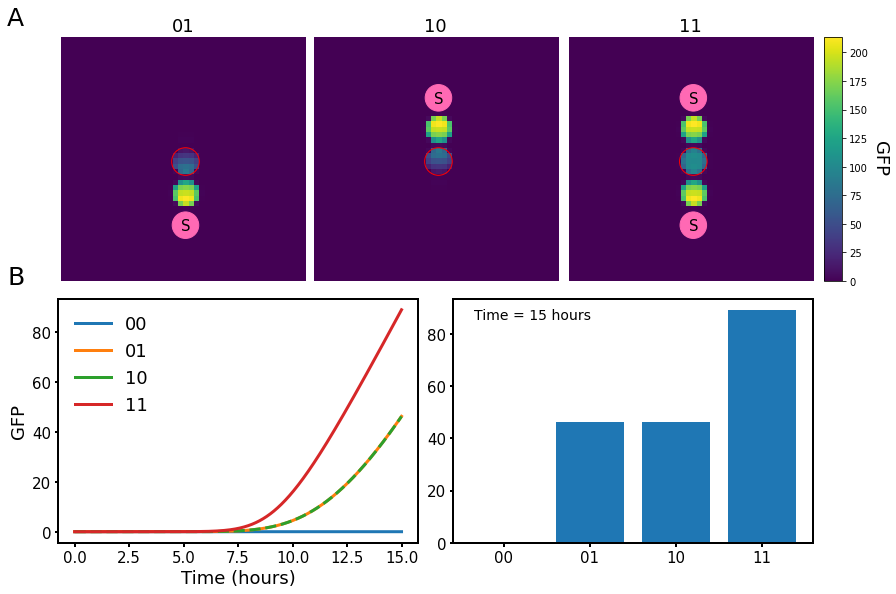

In [215]:
f

In [169]:
f.savefig('/Users/lucarosa/Library/Mobile Documents/com~apple~CloudDocs/THESIS/Upgrade/figures/logic/10-38-panel-2.pdf', bbox_inches = 'tight')
f.savefig('./simulations/10-38-panel-2.pdf', bbox_inches = 'tight')

## Sender positions: 17 - 31

216.9005266993664
216.90052218624558
222.43419140281463


Text(23, 30, 'S')

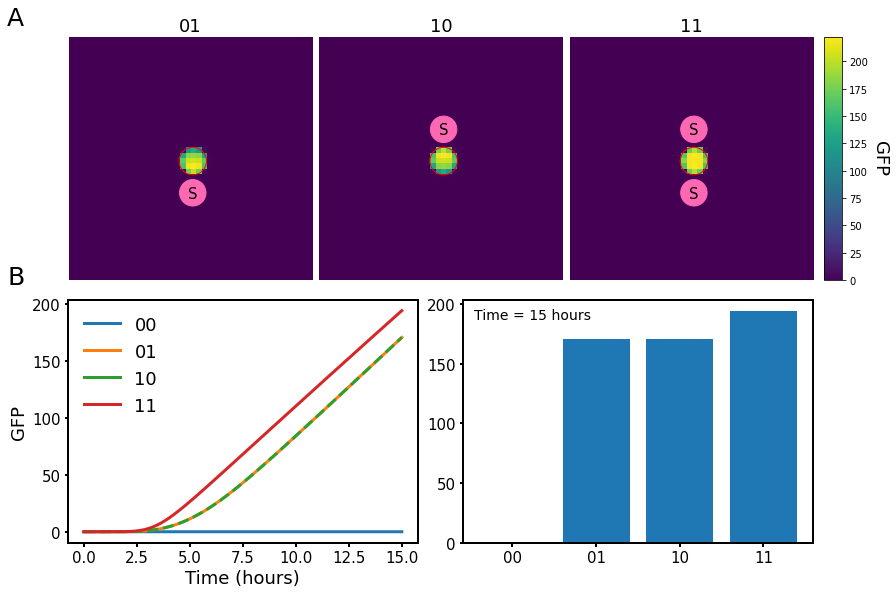

In [234]:
#create grid structure
f = plt.figure(constrained_layout=True, figsize = (12,8))
gs = f.add_gridspec(2, 6)
ax = [0]*5
ax[0] = f.add_subplot(gs[0, :2])
ax[1] = f.add_subplot(gs[0, 2:4])
ax[2] = f.add_subplot(gs[0, 4:])
ax[3] = f.add_subplot(gs[1, :3])
ax[4] = f.add_subplot(gs[1, 3:])

#cells position
rec_pos = [24]
and_gate = np.zeros(4)
senders = [31,17,[17,31]]
# senders = [[3,45],3,45,[]]
output = [24]
r, c = get_coo_from_pos(output)

df_and = pd.DataFrame()
#run simulations and create dfs
for i, inputs in enumerate(senders):
    U = full_setup(sender_seed= inputs, receiver_seed=rec_pos, ara = 100)
    sim = runModel(900,0.1,theta,U)
    ax[i].imshow(sim[6,:,:,-1])
    df_and[i+1] = sim[6,r,c,:].mean(axis = 0)
    and_gate[i+1] = sim[6,r,c,-1].mean()
    [a.axis('off') for a in ax[:3]]
    print(sim[6,:,:,-1].max())
    
#add colorbar
im3 = ax[2].get_images()[0]
f.colorbar(im3, ax=ax[2])

#run simulation w/ no inputs
U = full_setup(sender_seed= [], receiver_seed=rec_pos, ara = 100)
sim = runModel(900,0.1,theta,U)
df_and.insert(loc = 0, column = 'x00', value = sim[6,r,c,:].mean(axis = 0))
# and_gate.insert(loc = 0, column = 'x00', value = sim[6,r,c,-1].mean(axis = 0)) 
# df_and[3] = sim[6,r,c,:].mean(axis = 0)
# and_gate[3] = sim[6,r,c,-1].mean()
df_and.index = df_and.index/600
df_and.plot(ax = ax[3], linewidth = '3', style = ["-", "-", "--","-"])
ax[4].bar(["00","01","10","11"],and_gate)


ax[0].set_title("01", fontsize = 18)
ax[1].set_title("10", fontsize = 18)
ax[2].set_title("11", fontsize = 18)

ax[3].spines['top'].set_visible(True)
ax[3].spines['right'].set_visible(True)
ax[3].spines['left'].set_linewidth(2)
ax[3].spines['bottom'].set_linewidth(2)
ax[3].spines['top'].set_linewidth(2)
ax[3].spines['right'].set_linewidth(2)
ax[3].yaxis.set_tick_params(width = 2)
ax[3].xaxis.set_tick_params(width = 2)
ax[3].title.set_size(12)
ax[3].xaxis.label.set_size(12)
ax[3].yaxis.label.set_size(12)
ax[3].tick_params(axis = 'x', labelsize = 15)
ax[3].tick_params(axis = 'y', labelsize = 15)
# ax[3].set_yticks(np.arange(0,0.9,0.1))
ax[3].set_xlabel('Time (hours)', fontsize = 18),
ax[3].set_ylabel('GFP', fontsize = 18)
# ax[3].set_ylim(-0.5, 220)

ax[4].spines['top'].set_visible(True)
ax[4].spines['right'].set_visible(True)
ax[4].yaxis.set_tick_params(width = 2)
ax[4].xaxis.set_tick_params(width = 2)
ax[4].spines['left'].set_linewidth(2)
ax[4].spines['bottom'].set_linewidth(2)
ax[4].spines['right'].set_linewidth(2)
ax[4].spines['top'].set_linewidth(2)
ax[4].tick_params(axis = 'x', labelsize = 15)
ax[4].tick_params(axis = 'y', labelsize = 15)
# ax[4].set_ylim(-0.5, 220)
# ax[4].set_yticks(np.arange(0,0.9,0.1))

legend_elements = [Line2D([0], [0], color='tab:blue', lw=3, label='00'),
                   Line2D([0], [0], color = 'tab:orange', lw =3,label='01'),
                   Line2D([0], [0], color = 'tab:green', lw =3,label='10'),
                   Line2D([0], [0], color = 'tab:red', lw =3,label='11')]
ax[3].legend(handles = legend_elements, frameon = False, fontsize = 18)
f.text(1,0.75, 'GFP',va = 'center', rotation = 270, fontsize = 18 )
f.text(0.54, 0.47, 'Time = 15 hours', fontsize = 14)
f.text(0, 0.53, "B",fontsize = 25)
f.text(0, 0.98, "A", fontsize = 25)

circle1 = plt.Circle((23,23), 2.6, color = 'r', fill = False)
circle2 = plt.Circle((23,23), 2.6, color = 'r', fill = False)
circle3 = plt.Circle((23,23), 2.6, color = 'r', fill = False)
ax[0].add_patch(circle1)
ax[1].add_patch(circle2)
ax[2].add_patch(circle3)

circle1 = plt.Circle((23,17), 2.5, color = 'hotpink', fill = True)
circle2 = plt.Circle((23,17), 2.5, color = 'hotpink', fill = True)
ax[1].add_patch(circle1)
ax[2].add_patch(circle2)
circle1 = plt.Circle((23,29), 2.5, color = 'hotpink', fill = True)
circle2 = plt.Circle((23,29), 2.5, color = 'hotpink', fill = True)
ax[0].add_patch(circle1)
ax[2].add_patch(circle2)

ax[1].annotate("S", xy=(23, 18), fontsize=15, ha="center")
ax[2].annotate("S", xy=(23, 18), fontsize=15, ha="center")
ax[0].annotate("S", xy=(23, 30), fontsize=15, ha="center")
ax[2].annotate("S", xy=(23, 30), fontsize=15, ha="center")

In [235]:
f.savefig('/Users/lucarosa/Library/Mobile Documents/com~apple~CloudDocs/THESIS/Upgrade/figures/logic/17-31-panel.pdf', bbox_inches = 'tight')
f.savefig('./simulations/17-31-panel.pdf', bbox_inches = 'tight')

## TESTING

Text(0, 0.98, 'A')

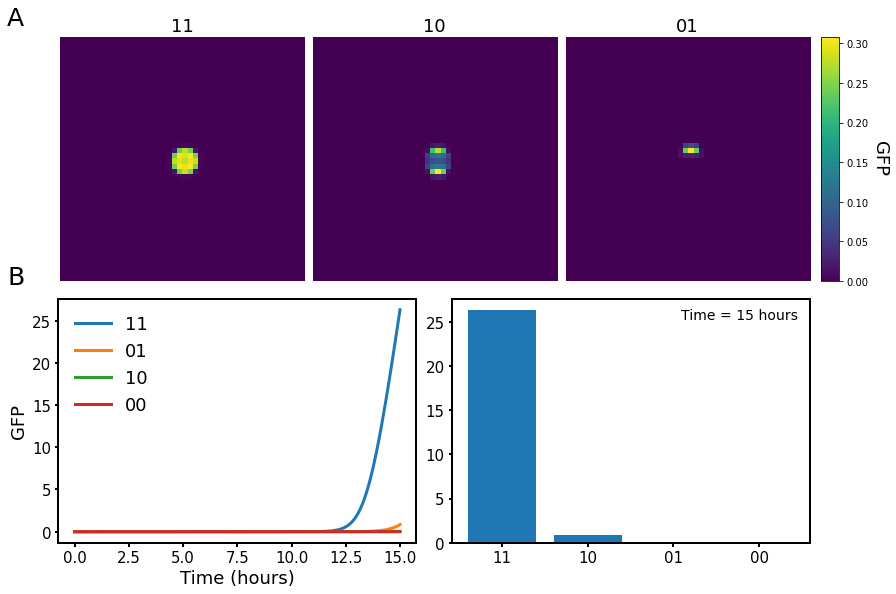

In [220]:
#create grid structure
f = plt.figure(constrained_layout=True, figsize = (12,8))
gs = f.add_gridspec(2, 6)
ax = [0]*5
ax[0] = f.add_subplot(gs[0, :2])
ax[1] = f.add_subplot(gs[0, 2:4])
ax[2] = f.add_subplot(gs[0, 4:])
ax[3] = f.add_subplot(gs[1, :3])
ax[4] = f.add_subplot(gs[1, 3:])

#cells position
rec_pos = [24]
and_gate = np.zeros(4)
senders = [[3,45,21,27],[3,45],3]
# senders = [[3,45],3,45,[]]
output = [24]
r, c = get_coo_from_pos(output)

df_and = pd.DataFrame()
#run simulations and create dfs
for i, inputs in enumerate(senders):
    U = full_setup(sender_seed= inputs, receiver_seed=rec_pos, ara = 100)
    sim = runModel(900,0.1,theta,U)
    ax[i].imshow(sim[6,:,:,-1])
    df_and[i] = sim[6,r,c,:].mean(axis = 0)
    and_gate[i] = sim[6,r,c,-1].mean()
    [a.axis('off') for a in ax[:3]]
    
#add colorbar
im3 = ax[2].get_images()[0]
f.colorbar(im3, ax=ax[2])

#run simulation w/ no inputs
U = full_setup(sender_seed= [], receiver_seed=rec_pos, ara = 100)
sim = runModel(900,0.1,theta,U)
df_and[3] = sim[6,r,c,:].mean(axis = 0)
and_gate[3] = sim[6,r,c,-1].mean()
df_and.index = df_and.index/600
df_and.plot(ax = ax[3], linewidth = '3')
ax[4].bar(["11","10","01","00"],and_gate)


ax[0].set_title("11", fontsize = 18)
ax[1].set_title("10", fontsize = 18)
ax[2].set_title("01", fontsize = 18)

ax[3].spines['top'].set_visible(True)
ax[3].spines['right'].set_visible(True)
ax[3].spines['left'].set_linewidth(2)
ax[3].spines['bottom'].set_linewidth(2)
ax[3].spines['top'].set_linewidth(2)
ax[3].spines['right'].set_linewidth(2)
ax[3].yaxis.set_tick_params(width = 2)
ax[3].xaxis.set_tick_params(width = 2)
ax[3].title.set_size(12)
ax[3].xaxis.label.set_size(12)
ax[3].yaxis.label.set_size(12)
ax[3].tick_params(axis = 'x', labelsize = 15)
ax[3].tick_params(axis = 'y', labelsize = 15)
# ax[3].set_yticks(np.arange(0,0.9,0.1))
ax[3].set_xlabel('Time (hours)', fontsize = 18),
ax[3].set_ylabel('GFP', fontsize = 18)

ax[4].spines['top'].set_visible(True)
ax[4].spines['right'].set_visible(True)
ax[4].yaxis.set_tick_params(width = 2)
ax[4].xaxis.set_tick_params(width = 2)
ax[4].spines['left'].set_linewidth(2)
ax[4].spines['bottom'].set_linewidth(2)
ax[4].spines['right'].set_linewidth(2)
ax[4].spines['top'].set_linewidth(2)
ax[4].tick_params(axis = 'x', labelsize = 15)
ax[4].tick_params(axis = 'y', labelsize = 15)
# ax[4].set_yticks(np.arange(0,0.9,0.1))

ax[3].legend(["11","01","10","00"], frameon = False, fontsize = 18)
f.text(1,0.75, 'GFP',va = 'center', rotation = 270, fontsize = 18 )
f.text(0.78, 0.47, 'Time = 15 hours', fontsize = 14)
f.text(0, 0.53, "B",fontsize = 25)
f.text(0, 0.98, "A", fontsize = 25)

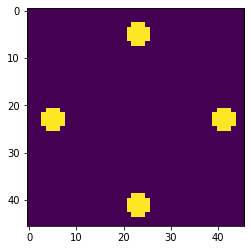

In [223]:
U = np.zeros([46,46])
r,c = get_coo_from_pos(senders[0])
U[r,c] = 100
plt.imshow(U)

In [222]:
senders[0]

[3, 45, 21, 27]

## OR gate bar chart

<BarContainer object of 4 artists>

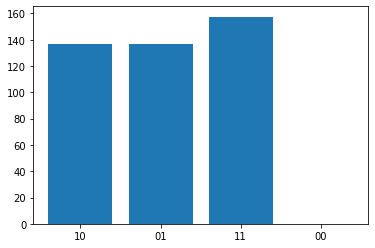

In [212]:
logic = np.zeros(4)
senders = [17,31,[17,31],[]]
output = [24]
r, c = get_coo_from_pos(output)

df = pd.DataFrame()

for i, inputs in enumerate(senders):
    U = full_setup(sender_seed= inputs, receiver_seed=[17,24,31], ara = 100)
    sim = runModel(900,0.1,theta,U)
    
    logic[i] = sim[6,r,c,-1].mean()

plt.bar(["10","01","11","00"],logic)

## 01

3.229665994644165


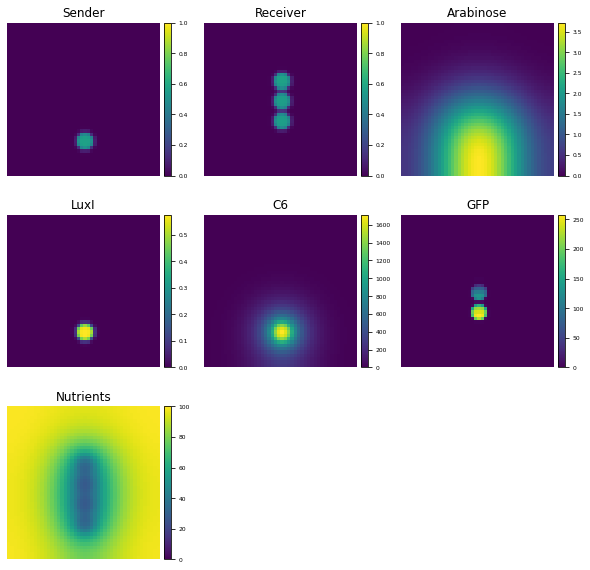

In [199]:
U = full_setup(sender_seed= [38], receiver_seed=[17,24,31], ara = 100)
start = time.time()
sim01 = runModel(1000,0.1,theta,U)
print(time.time() - start)
# np.save("AND01.npy",sim)
multi_plots(sim01[:,:,:,-1]);

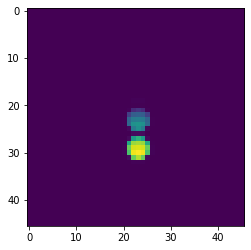

In [200]:
plt.imshow(sim01[6,:,:,-1])

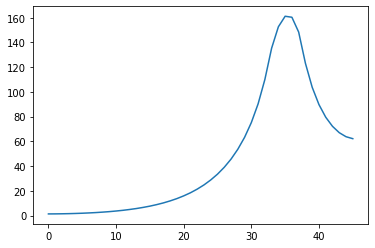

In [260]:
plt.plot(sim01[4,:,23,-1])

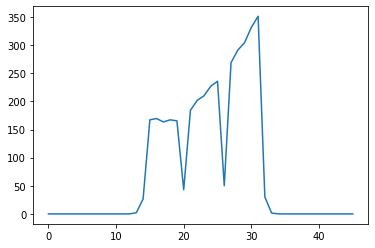

In [263]:
plt.plot(sim01[6,:,23,-1])

In [191]:
# a = multi_plots(sim01[:,:,:,-1]);
# # a.savefig("11.pdf")

## 11

2.4651520252227783


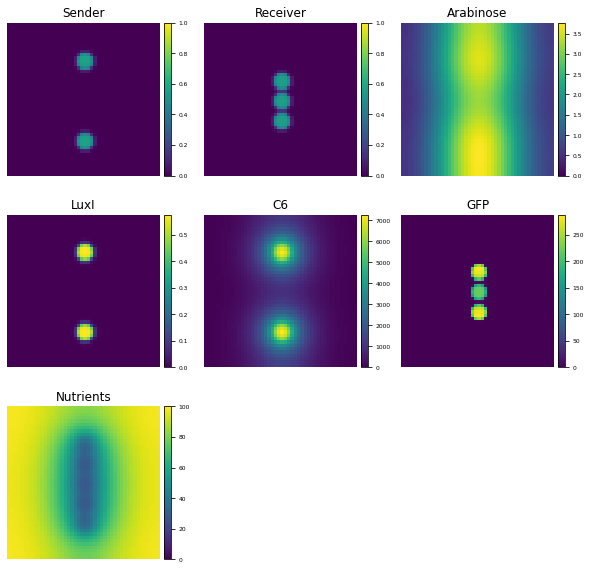

In [47]:
U = full_setup(sender_seed= [10,38], receiver_seed=[17,24,31], ara = 100)
start = time.time()
sim11 = runModel(1000,0.1,theta,U)
print(time.time() - start)
multi_plots(sim11[:,:,:,-1]);
# np.save("AND11.npy", sim)

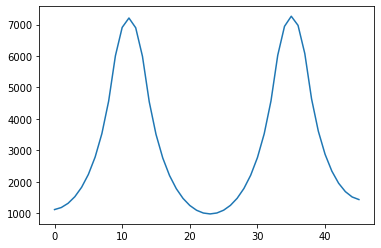

In [48]:
plt.plot(sim11[4,:,23,-1])

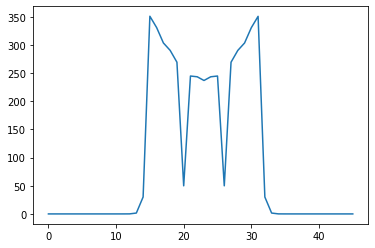

In [262]:
plt.plot(sim11[6,:,23,-1])

In [101]:
i01 = [24]
fr, fc = get_coo_from_pos(i01)

i11 = [24]
sr, sc = get_coo_from_pos(i11)

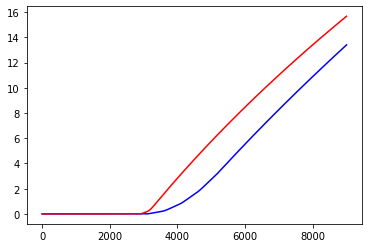

In [102]:
plt.plot(sim01[6,fr,fc,:9000].mean(axis=0), color = 'blue')
plt.plot(sim11[6,fr,fc,:9000].mean(axis=0), color = 'red')

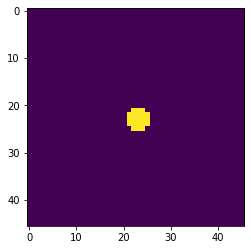

In [571]:
foo = np.zeros([46,46])
foo[fr,fc] = 4
plt.imshow(foo)

In [233]:
x_g = 1
lambda_g = 3
K_g = 20

In [243]:
gfp = x_g * hill(10, lambda_g, K_g)

# Receiver simulations 

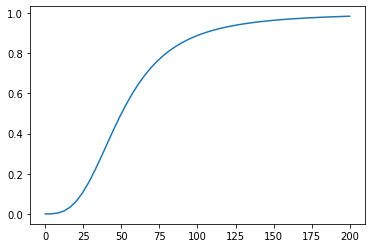

In [58]:
c6 = np.linspace(0,200)

y = hill(c6, 50, 3)

plt.plot(c6, y)

In [4]:
rec_cross = [3,10,17,31,38,45,
            21,22,23,25,26,27]

In [5]:
U = full_setup(sender_seed= [], receiver_seed=rec_cross, ahl = 6)
start = time.time()
sim = runModel(1000,0.1,theta,U)
print(time.time() - start)

2.9812450408935547


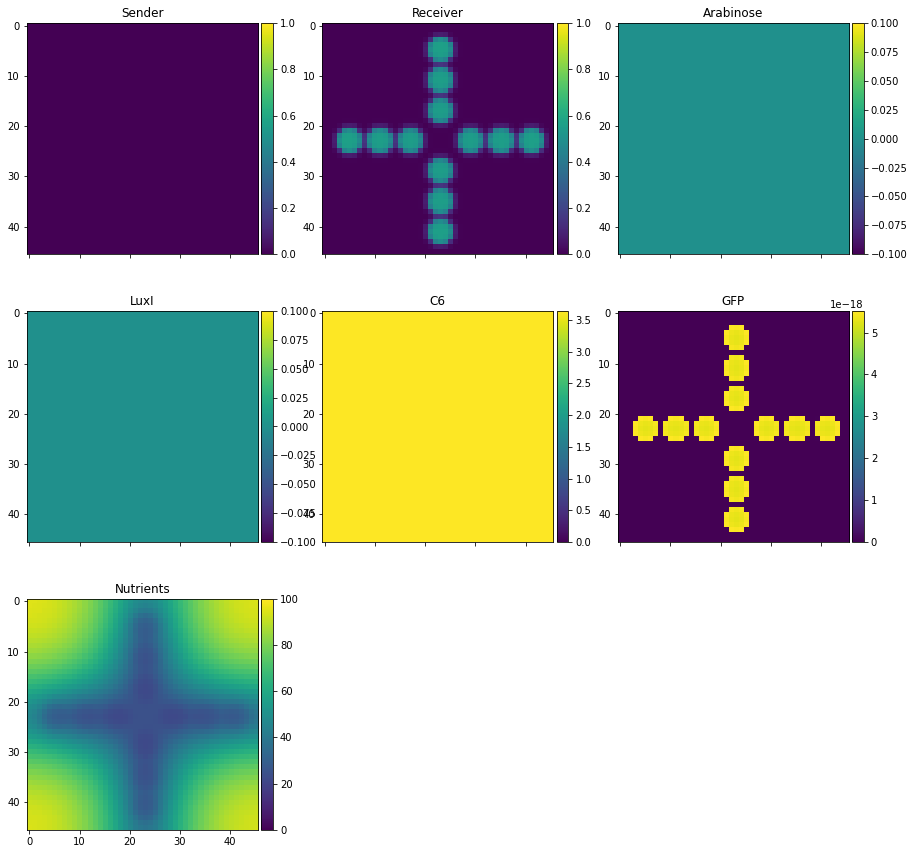

In [281]:
multi_plots(sim[:,:,:,-1]);

## Receiver: AHL VS GFP

In [27]:
r, c = get_coo_from_pos(rec_cross)
ahl = np.linspace(0,100,5)
gfp = np.zeros(ahl.shape)

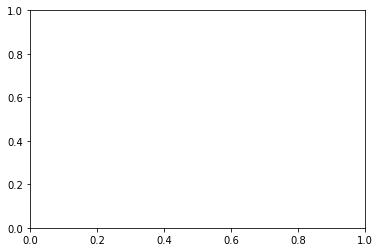

In [28]:
f, ax = plt.subplots()
def ahlgfp():
    for i,a in enumerate(ahl):
        U = full_setup(sender_seed= [], receiver_seed=rec_cross, ahl = a)
        sim = runModel(1000,0.1,theta,U)
        gfp[i] = sim[6,r,c,9000].mean()
    ax.plot(ahl, gfp)
#     print(sim[6,r,c,9000].mean())

## ALL POSITIONS

In [104]:
rec_cross = np.linspace(0,48,49, dtype = int)

In [108]:
U = full_setup(sender_seed= [], receiver_seed=rec_cross.tolist(), ahl = 6)
start = time.time()
sim = runModel(1000,0.1,theta,U)
print(time.time() - start)

3.2310469150543213


(-0.5, 45.5, 45.5, -0.5)

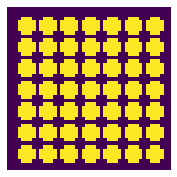

In [118]:
f, ax = plt.subplots(figsize = (3,3))
r, c = get_coo_from_pos(rec_cross)
foo = np.zeros([46,46])
foo[r,c] = 1
ax.imshow(foo)
ax.axis("off")
# plt.colorbar()

In [120]:
f.savefig("./full-grid.pdf", bbox_inches = 'tight')

In [121]:
!open .